# Figure 4 finalisation 

In [25]:
library(cowplot)
library(tidyverse)
library(ggrepel)

# Load inputs 

In [7]:
barplot.input = readRDS("../prognostic_model_development/barplot_input.rds")
scatterplot.input = readRDS("../prognostic_model_development/scatter_plot_input.rds")
forestplot.input = readRDS("../prognostic_model_development/forest_plot_input.rds")

In [5]:
head(barplot)

,Feature,Freq,Type
,<chr>,<int>,<fct>
1,Age,21,Clinical
2,APPL1 expression,3,Expression
3,APPL2 expression,5,Expression
4,AR expression,8,Expression
5,AURKA expression,15,Expression
6,AURKB expression,9,Expression


In [22]:
# Barplot based on freq for sig models 
gg.barplot.sig = barplot.input %>%  
            ggplot(aes(x = reorder(Feature, Freq), y = Freq,  fill = Type)) + 
            geom_bar(stat="identity", colour = "black") + coord_flip() + theme_classic() +
            scale_y_continuous(limits = c(0, 25), breaks = seq(from = 0, to = 25, by = 5) , expand = c(0, 0)) + 
            labs(y = "Frequency") + theme(axis.text = element_text(size = 14),
                                          axis.text.x = element_text(colour = "black"), 
                                          axis.text.y = element_text(colour = "black"),
                                          axis.title.y = element_blank(),
                                          legend.position = "None")

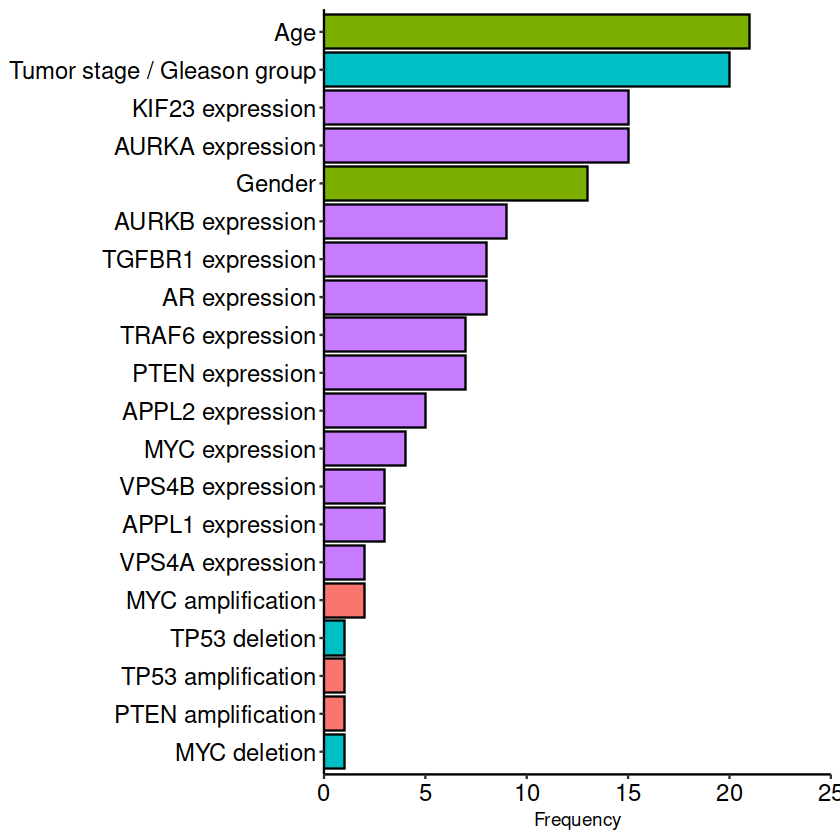

In [23]:
gg.barplot.sig

In [6]:
head(scatterplot.input)

,y,x,cancer.type,end.point
,<dbl>,<dbl>,<chr>,<chr>
1,0.008165434,0.316783485,ACC,OS
2,0.018650391,0.993002640,ACC,DSS
3,0.003348387,0.618128009,ACC,PFI
4,0.006493061,0.003179435,BLCA,OS
5,0.572348302,0.510470368,BLCA,DSS
6,0.101148884,0.001481595,BLCA,PFI


In [93]:
gg.scatter.bp = scatterplot.input %>% 
    ggplot(aes(-log10(x), -log10(y), colour = end.point, label = cancer.type)) + geom_text_repel(size = 4) + geom_point(size = 4) + theme_minimal() + 
    geom_vline(xintercept = -log10(0.05), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
    scale_color_manual(values = c("DSS"="#0077BB", 
                                  "DFI"="#EE3377", 
                                  "OS"="#EE7733",
                                  "PFI"="#009988")) + 
    theme(axis.text = element_text(size = 14),
          axis.text.x = element_text(colour = "black"),
          axis.text.y = element_text(colour = "black"),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          legend.position="top") +
    xlim(c(0,8)) + ylim(c(0,8)) + coord_fixed()

In [34]:
gg.scatter = scatterplot.input %>% 
    ggplot(aes(-log10(x), -log10(y), colour = end.point, label = cancer.type)) + geom_text_repel(size = 3) + geom_point(size = 3) + theme_minimal() + 
    geom_vline(xintercept = -log10(0.05), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
    scale_color_manual(values = c("DSS"="#0077BB", 
                                  "DFI"="#EE3377", 
                                  "OS"="#EE7733",
                                  "PFI"="#009988")) + 
    theme(axis.text = element_text(size = 14),
          axis.text.x = element_text(colour = "black"),
          axis.text.y = element_text(colour = "black"),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          legend.position="top") +
    xlim(c(0,8)) + ylim(c(0,8)) + coord_fixed()

Warning message:
“ggrepel: 43 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


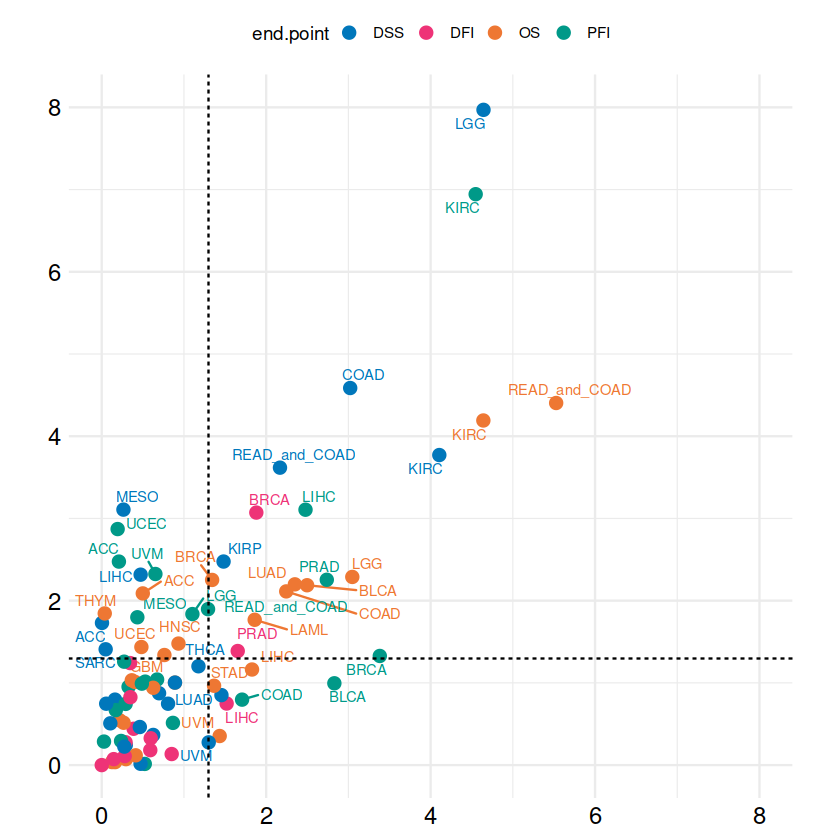

In [35]:
gg.scatter

Forest plots 

In [57]:
forest.outperf = forestplot.input$outperf %>% 
                                   ggplot() +
                                   geom_pointrange(aes(x = C.index.prog, 
                                                       y = `Model`, 
                                                       xmin = CI.lower.prog, 
                                                       xmax = CI.upper.prog, 
                                                       color = `End point`), 
                                                       position = position_dodge(width = 0.75), size=0.8) + 
                                                       scale_color_manual(values = c("DSS"="#0077BB", 
                                                                          "DFI"="#EE3377", 
                                                                          "OS"="#EE7733",
                                                                          "PFI"="#009988")) +  
                                    geom_point(data = forestplot.input$outperf, mapping = aes(x = C.index.ref, 
                                                       y = `Model`), 
                                                       position = position_dodge(width = 0.75), size=4, shape=23) + 
                                                       theme_bw() +
                                                       theme(axis.text = element_text(size = 12),
                                                            axis.text.x = element_text(colour = "black"),
                                                            axis.text.y = element_text(colour = "black")) + 
                                                       labs(y = NULL, x = "C-index") + geom_vline(xintercept = 0.5, 
                                                                                        linetype = "dashed") + xlim(c(0.25,1))

In [58]:
forest.underperf  = forestplot.input$underperf %>% 
                                   ggplot() +
                                   geom_pointrange(aes(x = C.index.prog, 
                                                       y = `Model`, 
                                                       xmin = CI.lower.prog, 
                                                       xmax = CI.upper.prog, 
                                                       color = `End point`), 
                                                       position = position_dodge(width = 0.75), size=0.8) + 
                                                       scale_color_manual(values = c("DSS"="#0077BB", 
                                                                          "DFI"="#EE3377", 
                                                                          "OS"="#EE7733",
                                                                          "PFI"="#009988")) +  
                                    geom_point(data = forestplot.input$underperf, mapping = aes(x = C.index.ref, 
                                                       y = `Model`), 
                                                       position = position_dodge(width = 0.75), size=4, shape=23) + 
                                                       theme_bw() +
                                                       theme(axis.text = element_text(size = 12),
                                                            axis.text.x = element_text(colour = "black"),
                                                            axis.text.y = element_text(colour = "black")) + 
                                                       labs(y = NULL, x = "C-index") + geom_vline(xintercept = 0.5, 
                                                                                        linetype = "dashed") + xlim(c(0.25,1))

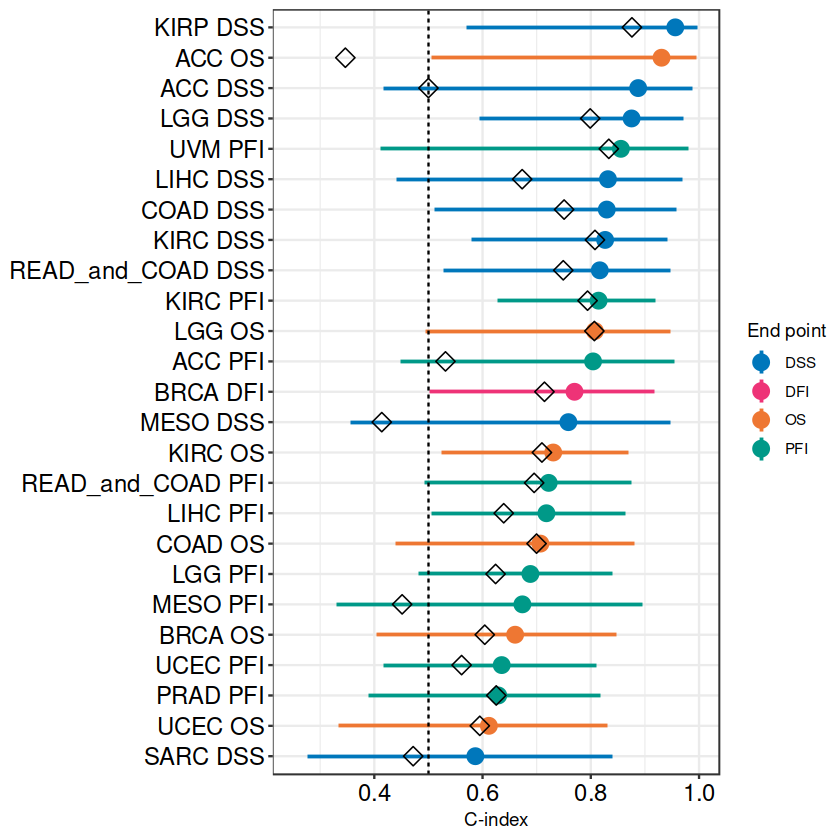

In [39]:
forest.outperf

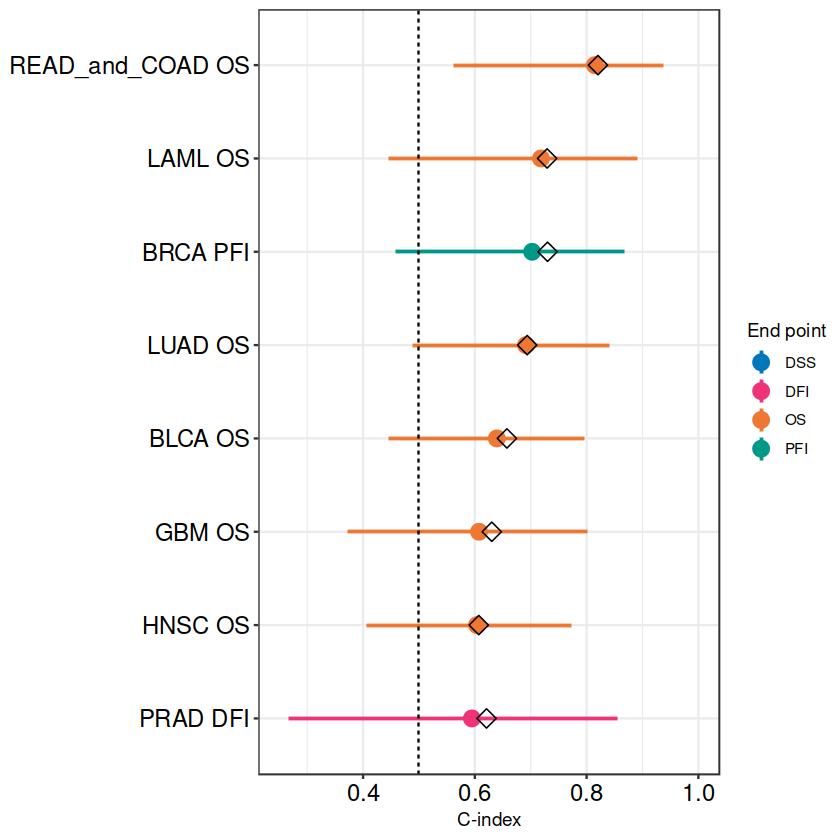

In [43]:
forest.underperf

In [59]:
plots <- align_plots(forest.outperf, forest.underperf, align = 'v', axis = 'l')
forest.comb = plot_grid(plots[[1]], plots[[2]], ncol = 1, rel_heights = c(3.125,1))

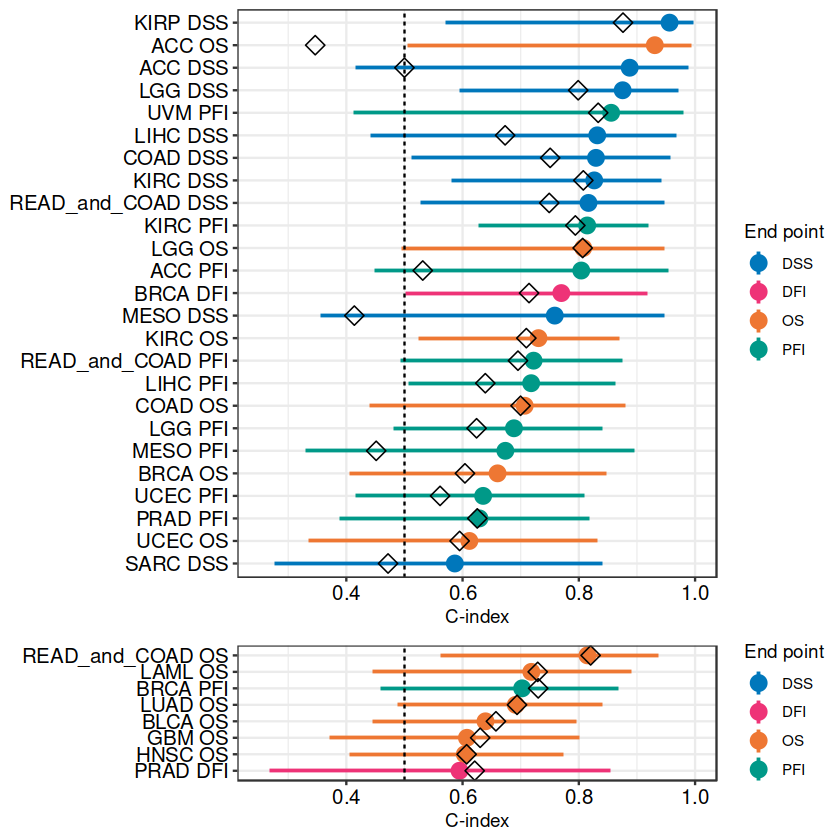

In [60]:
forest.comb

In [87]:
final.plot = plot_grid(gg.scatter, forest.comb, labels = c('a', 'b'), label_size = 24, ncol = 2, rel_widths = c(1.5, 1))

Warning message:
“ggrepel: 64 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


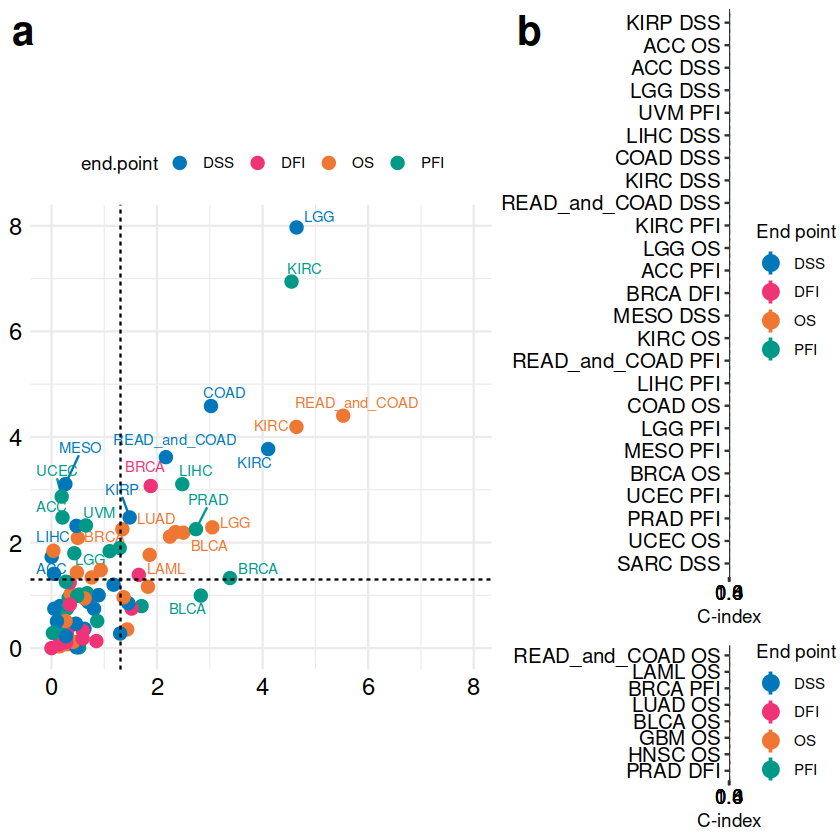

In [88]:
final.plot 

In [89]:
save_plot(plot = final.plot, filename = "test.pdf", base_height = 12, base_width = 20)

Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [105]:
final.plot.21 = plot_grid(gg.scatter.bp , forest.comb, labels = c('a', 'b'), label_size = 24, ncol = 2, rel_widths = c(1.75, 1))

In [106]:
save_plot(plot = final.plot.21, filename = "final_figure4_AB_small.pdf", base_height = 10, base_width = 16)

Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
